# 서울 지하철 노선 사용량
- https://www.data.go.kr/data/15071921/fileData.do#
- https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

In [2]:
import pandas as pd
file_path = "./ref/CARD_SUBWAY_MONTH_202501.csv"
data = pd.read_csv(file_path, encoding="utf-8")
data.head() # 데이터 5개만 가져오기

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,Unnamed: 6
0,20250101,수인선,송도,1453,1321,20250104,NaN
1,20250101,4호선,창동,12477,13408,20250104,NaN
2,20250101,4호선,쌍문,12792,12199,20250104,NaN
3,20250101,4호선,수유(강북구청),17606,17442,20250104,NaN
4,20250101,4호선,미아(서울사이버대학),6819,6532,20250104,NaN


In [3]:
columns = ['date', 'state_name', 'name', 'get_person', 'set_person', 'update','Nan'] 
data.columns = columns
data['total']=(data['get_person']).astype(int)+(data['set_person']).astype(int)
data = data[['date', 'state_name', 'name', 'get_person', 'set_person','total']]
data

,date,state_name,name,get_person,set_person,total
0,20250101,수인선,송도,1453,1321,2774
1,20250101,4호선,창동,12477,13408,25885
2,20250101,4호선,쌍문,12792,12199,24991
3,20250101,4호선,수유(강북구청),17606,17442,35048
4,20250101,4호선,미아(서울사이버대학),6819,6532,13351
...,...,...,...,...,...,...
19124,20250131,수인선,남동인더스파크,1622,1748,3370
19125,20250131,수인선,원인재,3834,3942,7776
19126,20250131,수인선,연수,4170,4016,8186
19127,20250131,수인선,송도,2076,1848,3924


In [4]:
data =data.groupby(['date','state_name','name','get_person','set_person','total']).sum().reset_index()
data.head()

,date,state_name,name,get_person,set_person,total
0,20250101,1호선,동대문,8630,8397,17027
1,20250101,1호선,동묘앞,8327,8754,17081
2,20250101,1호선,서울역,41901,35522,77423
3,20250101,1호선,시청,11904,11425,23329
4,20250101,1호선,신설동,6341,6152,12493


In [5]:
gdata=data[['state_name','name','date','total']]
gdata=gdata.sort_values(by=['name','date'],ascending=[True,True]) #name, date, total
gdata.head(10)

,state_name,name,date,total
565,우이신설선,4.19민주묘지,20250101,3220
1182,우이신설선,4.19민주묘지,20250102,5983
1798,우이신설선,4.19민주묘지,20250103,5756
2414,우이신설선,4.19민주묘지,20250104,5986
3031,우이신설선,4.19민주묘지,20250105,3250
3649,우이신설선,4.19민주묘지,20250106,5857
4266,우이신설선,4.19민주묘지,20250107,5872
4884,우이신설선,4.19민주묘지,20250108,5710
5502,우이신설선,4.19민주묘지,20250109,5150
6120,우이신설선,4.19민주묘지,20250110,5485


In [7]:
mdata=gdata.groupby(["state_name","name"]).sum().reset_index()
# mdata=gdata.groupby(by="name").sum().reset_index()
tdata=mdata[["state_name",'name','total']]
tdata

,state_name,name,total
0,1호선,동대문,669467
1,1호선,동묘앞,564871
2,1호선,서울역,3641701
3,1호선,시청,1403574
4,1호선,신설동,728346
...,...,...,...
616,중앙선,원덕,17402
617,중앙선,중랑,287249
618,중앙선,지평,2695
619,중앙선,팔당,41050


In [8]:
sdata=tdata.sort_values(by='total', ascending=False)#.reset_index()
sdata.head(10)
total_data = sdata[:20]
total_data

,state_name,name,total
10,2호선,강남,4264556
59,2호선,홍대입구,4254846
52,2호선,잠실(송파구청),4211104
2,1호선,서울역,3641701
14,2호선,구로디지털단지,2955955
37,2호선,신림,2952566
63,3호선,고속터미널,2803602
26,2호선,삼성(무역센터),2739577
36,2호선,신도림,2702968
30,2호선,선릉,2633247


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)

plt.rcParams["font.family"] = "D2coding"

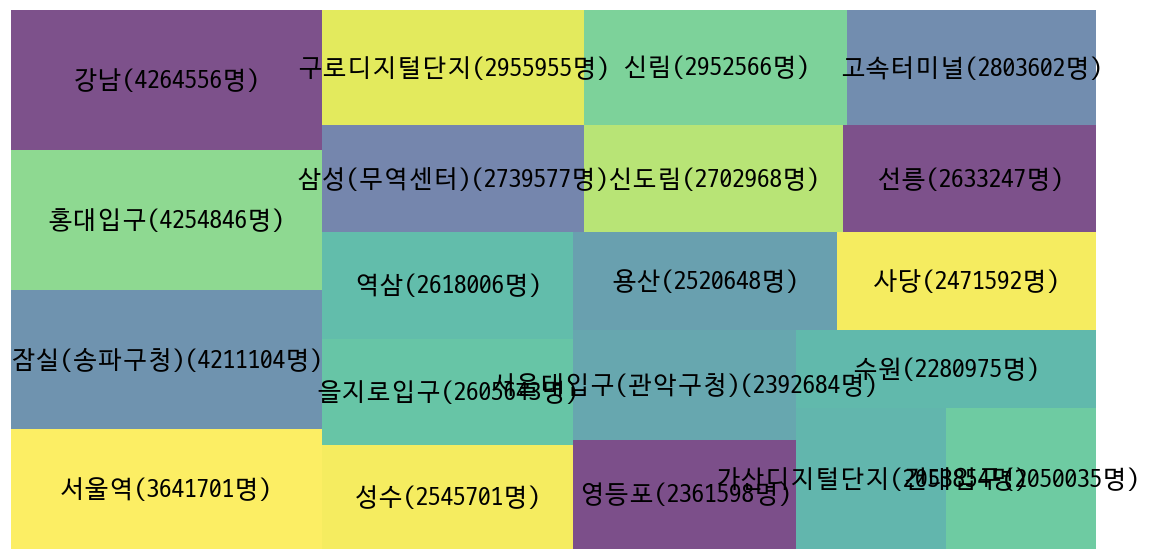

In [15]:
import squarify
plt.figure(figsize=(14,7))
squarify.plot(sizes=total_data['total'], label=[f'{x[0]}({x[1]}명)' for x in zip(total_data['name'],total_data['total'])],alpha=0.7)
# squarify.plot(sizes=total_data['total'], label=total_data.name, alpha=0.7)
plt.rcParams['font.size']=18
# plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis() #축 뒤집기
plt.axis("off") # 인덱스 없애기
# plt.savefig("saving_subway_seoul.png")
plt.show()

3
